## 2003-2011 Global Sexual Violence Analysis
In this notebook, we will analyze datasets from the UN-CTS resource, focusing on general sexual violence, rape cases, and incidents involving children. <br>
The analysis will provide insights into patterns and trends across these different categories.

## 1. Data Processing
### 1-1. Import Libraries, Load and Preview Data Structure

In [313]:
# Importing pandas for data analysis and manipulation (handling data frames)
import pandas as pd

# Importing matplotlib for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt  

# Importing specific functions from matplotlib for customizing tick formatting and axis limits
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Importing seaborn for statistical data visualization and enhanced graphics
import seaborn as sns

# Importing geopandas for working with geospatial data and map visualizations
import geopandas as gpd

# Importing KMeans clustering algorithm and StandardScaler for scaling data
from sklearn.cluster import KMeans

# Importing StandardScaler again for use in preprocessing to standardize features
from sklearn.preprocessing import StandardScaler

# Importing Prophet for time series forecasting
from prophet import Prophet

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the datasets
df_sv = pd.read_csv("/kaggle/input/cts-2012-sv/cts_2012_sexual_violence.csv")
df_rape = pd.read_csv("/kaggle/input/cts-2012-sv/cts_2012_rape.csv")
df_children = pd.read_csv("/kaggle/input/cts-2012-sv/cts_2012_sv_against_children.csv")

# Preview the first five rows for each of datasets
print("\nSexual Violence:")
display(df_sv.head())

print("\nRape:")
display(df_rape.head())

print("\nChildern:")
display(df_children.head())


Sexual Violence:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,NaN,Eastern Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.540866,8.567037,8.338454,7.743285
1,Africa,NaN,Eastern Africa,NaN,Kenya,NaN,2880.0,2590.0,2965.0,3051.0,...,NaN,NaN,8.299191,7.272303,8.114185,8.139202,7.070525,10.308602,11.890104,11.302645
2,Africa,NaN,Eastern Africa,NaN,Mauritius,298.0,297.0,314.0,420.0,384.0,...,NaN,24.157057,23.842610,24.985240,33.157441,30.102301,32.168892,34.220883,33.251948,35.665276
3,Africa,NaN,Eastern Africa,NaN,Mozambique,NaN,834.0,789.0,639.0,629.0,...,NaN,NaN,4.119274,3.798746,3.001275,2.883823,2.865727,2.681703,NaN,NaN
4,Africa,NaN,Eastern Africa,NaN,Uganda,NaN,NaN,14101.0,17046.0,32305.0,...,NaN,NaN,NaN,49.596915,58.038319,106.476967,33.073392,26.711642,25.864120,NaN



Rape:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,NaN,Eastern Africa,Eastern Africa,Burundi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.389797,8.358980,8.254950,7.533377
1,Africa,NaN,Eastern Africa,NaN,Kenya,NaN,1440.0,1365.0,1291.0,876.0,...,NaN,NaN,4.149596,3.832700,3.533023,2.336919,1.911304,2.146358,2.275831,2.244667
2,Africa,NaN,Eastern Africa,NaN,Mauritius,53.0,40.0,38.0,64.0,77.0,...,NaN,4.296389,3.211126,3.023691,5.052562,6.036138,5.374464,4.413100,3.925577,4.439026
3,Africa,NaN,Eastern Africa,NaN,Mozambique,NaN,102.0,64.0,46.0,41.0,...,NaN,NaN,0.503796,0.308137,0.216054,0.187976,0.210452,0.192488,NaN,NaN
4,Africa,NaN,Eastern Africa,NaN,Uganda,537.0,549.0,732.0,750.0,599.0,...,NaN,2.015643,1.994794,2.574636,2.553604,1.974298,4.901180,1.912388,2.121187,NaN



Childern:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,NaN,Eastern Africa,Eastern Africa,Kenya,NaN,1233.0,1067.0,1445.0,1984.0,...,NaN,NaN,3.553091,2.995964,3.954468,5.292749,4.808165,6.641801,8.078952,7.668880
1,Africa,NaN,Eastern Africa,NaN,Mauritius,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.820240,22.860714,22.118594
2,Africa,NaN,Eastern Africa,NaN,Uganda,NaN,NaN,12545.0,15385.0,12230.0,...,NaN,NaN,NaN,44.124055,52.382937,40.309962,27.553183,22.738571,22.629983,NaN
3,Africa,NaN,Middle Africa,Middle Africa,Cameroon,333.0,126.0,117.0,131.0,268.0,...,NaN,1.984107,0.734040,0.666530,0.729870,1.460489,0.943558,NaN,NaN,NaN
4,Africa,NaN,Middle Africa,NaN,Sao Tome and Principe,NaN,NaN,NaN,1.0,0.0,...,NaN,NaN,NaN,NaN,0.645286,0.000000,2.502315,1.230656,1.209212,2.966901


In [314]:
# Display the structure and summary of the data
print("\nDataset Information:")

print("\nSexual Violence:")
df_sv.info()

print("\nRape:")
df_rape.info()

print("\nChildern:")
df_children.info()

# Check for missing values
print("\nMissing Values:")

print("\nSexual Violence:")
print(df_sv.isnull().sum())

print("\nRape:")
print(df_rape.isnull().sum())

print("\nChildern:")
print(df_children.isnull().sum())


Dataset Information:

Sexual Violence:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             102 non-null    object 
 1   Sub-region I       23 non-null     object 
 2   Sub-region II      102 non-null    object 
 3   Sub-region II.1    19 non-null     object 
 4   Country/territory  102 non-null    object 
 5   2003               29 non-null     float64
 6   2004               48 non-null     float64
 7   2005               63 non-null     float64
 8   2006               78 non-null     float64
 9   2007               94 non-null     float64
 10  2008               95 non-null     float64
 11  2009               87 non-null     float64
 12  2010               80 non-null     float64
 13  2011               72 non-null     float64
 14  Unnamed: 14        0 non-null      float64
 15  2003.1             26 non-null    

#### 1-2. Handle Missing Data

In [315]:
# Fillint Missing Values

# For numeric columns, fill with the median
# Only select numeric columns for filling missing values
numeric_columns_sv = df_sv.select_dtypes(include=['number']).columns
numeric_columns_rape = df_rape.select_dtypes(include=['number']).columns
numeric_columns_children = df_children.select_dtypes(include=['number']).columns

# Fill missing values for numeric columns with the median
df_sv[numeric_columns_sv] = df_sv[numeric_columns_sv].fillna(df_sv[numeric_columns_sv].median())
df_rape[numeric_columns_rape] = df_rape[numeric_columns_rape].fillna(df_rape[numeric_columns_rape].median())
df_children[numeric_columns_children] = df_children[numeric_columns_children].fillna(df_children[numeric_columns_children].median())


# For categorical columns, fill with "Unknown"
df_sv.fillna("Unknown", inplace=True)
df_rape.fillna("Unknown", inplace=True)
df_children.fillna("Unknown", inplace=True)

# Recheck Missing Values
print("\nMissing Values After Cleaning:")
print("\nSexual Violence:")
display(df_sv.isnull().sum())

print("\nRape:")
display(df_rape.isnull().sum())

print("\nChildern:")
display(df_children.isnull().sum())

# Preview the first five rows for each of datasets
print("\nSexual Violence:")
display(df_sv.head())

print("\nRape:")
display(df_rape.head())

print("\nChildern:")
display(df_children.head())


Missing Values After Cleaning:

Sexual Violence:


Region               0
Sub-region I         0
Sub-region II        0
Sub-region II.1      0
Country/territory    0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
Unnamed: 14          0
2003.1               0
2004.1               0
2005.1               0
2006.1               0
2007.1               0
2008.1               0
2009.1               0
2010.1               0
2011.1               0
dtype: int64


Rape:


Region               0
Sub-region I         0
Sub-region II        0
Sub-region II.1      0
Country/territory    0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
Unnamed: 14          0
2003.1               0
2004.1               0
2005.1               0
2006.1               0
2007.1               0
2008.1               0
2009.1               0
2010.1               0
2011.1               0
dtype: int64


Childern:


Region               0
Sub-region I         0
Sub-region II        0
Sub-region II.1      0
Country/territory    0
2003                 0
2004                 0
2005                 0
2006                 0
2007                 0
2008                 0
2009                 0
2010                 0
2011                 0
Unnamed: 14          0
2003.1               0
2004.1               0
2005.1               0
2006.1               0
2007.1               0
2008.1               0
2009.1               0
2010.1               0
2011.1               0
dtype: int64


Sexual Violence:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,Unknown,Eastern Africa,Eastern Africa,Burundi,1581.0,1218.5,929.0,1009.0,786.0,...,Unknown,12.692640,14.285928,16.430994,15.460034,15.455373,7.540866,8.567037,8.338454,7.743285
1,Africa,Unknown,Eastern Africa,Unknown,Kenya,1581.0,2880.0,2590.0,2965.0,3051.0,...,Unknown,12.692640,8.299191,7.272303,8.114185,8.139202,7.070525,10.308602,11.890104,11.302645
2,Africa,Unknown,Eastern Africa,Unknown,Mauritius,298.0,297.0,314.0,420.0,384.0,...,Unknown,24.157057,23.842610,24.985240,33.157441,30.102301,32.168892,34.220883,33.251948,35.665276
3,Africa,Unknown,Eastern Africa,Unknown,Mozambique,1581.0,834.0,789.0,639.0,629.0,...,Unknown,12.692640,4.119274,3.798746,3.001275,2.883823,2.865727,2.681703,21.137827,20.818566
4,Africa,Unknown,Eastern Africa,Unknown,Uganda,1581.0,1218.5,14101.0,17046.0,32305.0,...,Unknown,12.692640,14.285928,49.596915,58.038319,106.476967,33.073392,26.711642,25.864120,20.818566



Rape:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,Unknown,Eastern Africa,Eastern Africa,Burundi,389.0,378.0,339.5,341.0,345.5,...,Unknown,5.024429,4.419220,4.915979,5.279090,5.153860,7.389797,8.358980,8.254950,7.533377
1,Africa,Unknown,Eastern Africa,Unknown,Kenya,389.0,1440.0,1365.0,1291.0,876.0,...,Unknown,5.024429,4.149596,3.832700,3.533023,2.336919,1.911304,2.146358,2.275831,2.244667
2,Africa,Unknown,Eastern Africa,Unknown,Mauritius,53.0,40.0,38.0,64.0,77.0,...,Unknown,4.296389,3.211126,3.023691,5.052562,6.036138,5.374464,4.413100,3.925577,4.439026
3,Africa,Unknown,Eastern Africa,Unknown,Mozambique,389.0,102.0,64.0,46.0,41.0,...,Unknown,5.024429,0.503796,0.308137,0.216054,0.187976,0.210452,0.192488,6.039638,6.561802
4,Africa,Unknown,Eastern Africa,Unknown,Uganda,537.0,549.0,732.0,750.0,599.0,...,Unknown,2.015643,1.994794,2.574636,2.553604,1.974298,4.901180,1.912388,2.121187,6.561802



Childern:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,2003,2004,2005,2006,2007,...,Unnamed: 14,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1
0,Africa,Unknown,Eastern Africa,Eastern Africa,Kenya,704.5,1233.0,1067.0,1445.0,1984.0,...,Unknown,7.840240,3.553091,2.995964,3.954468,5.292749,4.808165,6.641801,8.078952,7.668880
1,Africa,Unknown,Eastern Africa,Unknown,Mauritius,704.5,627.0,601.0,445.0,375.0,...,Unknown,7.840240,6.186792,7.142687,6.743778,6.177863,6.563577,19.820240,22.860714,22.118594
2,Africa,Unknown,Eastern Africa,Unknown,Uganda,704.5,627.0,12545.0,15385.0,12230.0,...,Unknown,7.840240,6.186792,44.124055,52.382937,40.309962,27.553183,22.738571,22.629983,7.386056
3,Africa,Unknown,Middle Africa,Middle Africa,Cameroon,333.0,126.0,117.0,131.0,268.0,...,Unknown,1.984107,0.734040,0.666530,0.729870,1.460489,0.943558,6.502577,7.117590,7.386056
4,Africa,Unknown,Middle Africa,Unknown,Sao Tome and Principe,704.5,627.0,601.0,1.0,0.0,...,Unknown,7.840240,6.186792,7.142687,0.645286,0.000000,2.502315,1.230656,1.209212,2.966901


#### 1-3. Rename and Reshape Each Dataset

In [316]:
# Define years and categories
count_years = [str(year) for year in range(2003, 2012)]
rate_years = [str(year) + ".1" for year in range(2003, 2012)]

# Rename columns for clarity (crime count and crime rate)
rename_dict = {yr: f"Count_{yr}" for yr in count_years}
rename_dict.update({yr: f"Rate_{yr[:-2]}" for yr in rate_years})

# Rename columns in each dataset using the rename_dict mapping
df_sv.rename(columns=rename_dict, inplace=True)
df_rape.rename(columns=rename_dict, inplace=True)
df_children.rename(columns=rename_dict, inplace=True)

# Identify the common region-based columns
id_vars = ["Region", "Sub-region I", "Sub-region II", "Sub-region II.1", "Country/territory"]
value_vars_counts = [f"Count_{yr}" for yr in count_years]
value_vars_rates = [f"Rate_{yr[:-2]}" for yr in rate_years]

# Reshape dataset
# SV
df_sv_counts = df_sv.melt(id_vars=id_vars, value_vars=value_vars_counts, var_name="Year", value_name="Crime Count")
df_sv_rates = df_sv.melt(id_vars=id_vars, value_vars=value_vars_rates, var_name="Year", value_name="Crime Rate")

# Rape
df_rape_counts = df_rape.melt(id_vars=id_vars, value_vars=value_vars_counts, var_name="Year", value_name="Crime Count")
df_rape_rates = df_rape.melt(id_vars=id_vars, value_vars=value_vars_rates, var_name="Year", value_name="Crime Rate")

# Children
df_children_counts = df_children.melt(id_vars=id_vars, value_vars=value_vars_counts, var_name="Year", value_name="Crime Count")
df_children_rates = df_children.melt(id_vars=id_vars, value_vars=value_vars_rates, var_name="Year", value_name="Crime Rate")

# Clean Year column
# SV
df_sv_counts["Year"] = df_sv_counts["Year"].str.replace("Count_", "")
df_sv_rates["Year"] = df_sv_rates["Year"].str.replace("Rate_", "")

# Rape Cases
df_rape_counts["Year"] = df_rape_counts["Year"].str.replace("Count_", "")
df_rape_rates["Year"] = df_rape_rates["Year"].str.replace("Rate_", "")

# Children
df_children_counts["Year"] = df_children_counts["Year"].str.replace("Count_", "")
df_children_rates["Year"] = df_children_rates["Year"].str.replace("Rate_", "")

# Merge counts and rates separately
df_sv_cleaned = pd.merge(df_sv_counts, df_sv_rates, on=id_vars + ["Year"], how="left")
df_rape_cleaned = pd.merge(df_rape_counts, df_rape_rates, on=id_vars + ["Year"], how="left")
df_children_cleaned = pd.merge(df_children_counts, df_children_rates, on=id_vars + ["Year"], how="left")

# Convert Year to integer
df_sv_cleaned["Year"] = df_sv_cleaned["Year"].astype(int)
df_rape_cleaned["Year"] = df_rape_cleaned["Year"].astype(int)
df_children_cleaned["Year"] = df_children_cleaned["Year"].astype(int)

# Convert Crime Count to integer
df_sv_cleaned["Crime Count"] = df_sv_cleaned["Crime Count"].astype(int)
df_rape_cleaned["Crime Count"] = df_rape_cleaned["Crime Count"].astype(int)
df_children_cleaned["Crime Count"] = df_children_cleaned["Crime Count"].astype(int)

# Preview the first five rows of the cleaned datasets to ensure the renaming and reshaping were successful
print("\nSexual Violence:")
display(df_sv_cleaned.head())

print("\nRape:")
display(df_rape_cleaned.head())

print("\nChildren:")
display(df_children_cleaned.head())


Sexual Violence:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,Year,Crime Count,Crime Rate
0,Africa,Unknown,Eastern Africa,Eastern Africa,Burundi,2003,1581,12.692640
1,Africa,Unknown,Eastern Africa,Unknown,Kenya,2003,1581,12.692640
2,Africa,Unknown,Eastern Africa,Unknown,Mauritius,2003,298,24.157057
3,Africa,Unknown,Eastern Africa,Unknown,Mozambique,2003,1581,12.692640
4,Africa,Unknown,Eastern Africa,Unknown,Uganda,2003,1581,12.692640



Rape:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,Year,Crime Count,Crime Rate
0,Africa,Unknown,Eastern Africa,Eastern Africa,Burundi,2003,389,5.024429
1,Africa,Unknown,Eastern Africa,Unknown,Kenya,2003,389,5.024429
2,Africa,Unknown,Eastern Africa,Unknown,Mauritius,2003,53,4.296389
3,Africa,Unknown,Eastern Africa,Unknown,Mozambique,2003,389,5.024429
4,Africa,Unknown,Eastern Africa,Unknown,Uganda,2003,537,2.015643



Children:


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,Year,Crime Count,Crime Rate
0,Africa,Unknown,Eastern Africa,Eastern Africa,Kenya,2003,704,7.840240
1,Africa,Unknown,Eastern Africa,Unknown,Mauritius,2003,704,7.840240
2,Africa,Unknown,Eastern Africa,Unknown,Uganda,2003,704,7.840240
3,Africa,Unknown,Middle Africa,Middle Africa,Cameroon,2003,333,1.984107
4,Africa,Unknown,Middle Africa,Unknown,Sao Tome and Principe,2003,704,7.840240


#### 1-4. Merge All Datasets and Add Category Labels

In [317]:
# Add category column
df_sv_cleaned["Category"] = "General Sexual Violence" # General sexual violence cases
df_rape_cleaned["Category"] = "Rape Cases" # Specific cases of rape
df_children_cleaned["Category"] = "Violence Against Children" # Cases of violence against children

# Combine the datasets into one
df_combined = pd.concat([df_sv_cleaned, df_rape_cleaned, df_children_cleaned], ignore_index=True)

# Display the first and last five rows to verify the combined dataset
display(df_combined.head())
display(df_combined.tail())

,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,Year,Crime Count,Crime Rate,Category
0,Africa,Unknown,Eastern Africa,Eastern Africa,Burundi,2003,1581,12.692640,General Sexual Violence
1,Africa,Unknown,Eastern Africa,Unknown,Kenya,2003,1581,12.692640,General Sexual Violence
2,Africa,Unknown,Eastern Africa,Unknown,Mauritius,2003,298,24.157057,General Sexual Violence
3,Africa,Unknown,Eastern Africa,Unknown,Mozambique,2003,1581,12.692640,General Sexual Violence
4,Africa,Unknown,Eastern Africa,Unknown,Uganda,2003,1581,12.692640,General Sexual Violence


,Region,Sub-region I,Sub-region II,Sub-region II.1,Country/territory,Year,Crime Count,Crime Rate,Category
2875,Europe,Unknown,Western Europe,Unknown,Liechtenstein,2011,9,7.386056,Violence Against Children
2876,Europe,Unknown,Western Europe,Unknown,Luxembourg,2011,23,4.457874,Violence Against Children
2877,Europe,Unknown,Western Europe,Unknown,Netherlands,2011,825,4.950571,Violence Against Children
2878,Europe,Unknown,Western Europe,Unknown,Switzerland,2011,1403,18.216781,Violence Against Children
2879,Oceania,Unknown,Australia and New Zealand,Australia and New Zealand,New Zealand,2011,1906,43.175810,Violence Against Children


## 2. Data Visualiztion
#### 2-1. Pie Chart for All Cases
This chart visualizes the distribution of total crime cases across three categories: Sexual Violence, Rape Cases, and Violence Against Children. The chart highlights the proportion of each category in relation to the total number of cases.

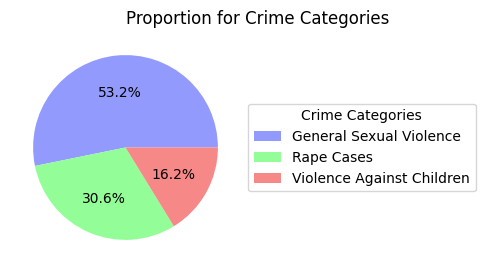

In [320]:
# Summarize total cases per category
category_counts = df_combined.groupby("Category")["Crime Count"].sum()

# Plot Pie Chart
plt.figure(figsize=(3, 3))

# Create the pie chart and store the wedges
wedges, texts, autotexts = plt.pie(category_counts, autopct="%1.1f%%", colors=["#939afe", "#93fe97", "#f78888"])

# Add title
plt.title("Proportion for Crime Categories", ha="left")

# Add a legend
plt.legend(wedges, category_counts.index, title="Crime Categories", loc="center left", bbox_to_anchor=(1, 0.5))

# Display the pl
plt.show()

#### 2-2. Line Chart for Each Case
This chart illustrates the time trends for each crime category, showing how the total number of cases, including Sexual Violence, Rape Cases, and Violence Against Children, has evolved over the years.

<Figure size 600x400 with 0 Axes>

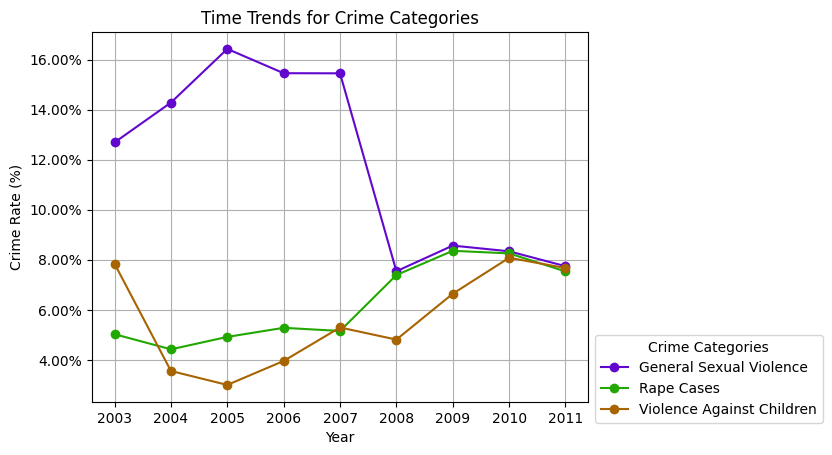

In [321]:
# Group by Year and Category and use the individual Crime Rate values
time_trends = df_combined.pivot_table(index="Year", columns="Category", values="Crime Rate", aggfunc="first")

# Plot the time trends
plt.figure(figsize=(6, 4))   

# Define custom colors for each category
custom_colors = ["#6207ce", "#23a701", "#a76401"]

# Plot the lines with the specified colors
time_trends.plot(kind='line', marker='o', color=custom_colors)

# Add title and labels
plt.title("Time Trends for Crime Categories")
plt.xlabel("Year")
plt.ylabel("Crime Rate (%)")  # Change label to reflect percentage

# Format y-axis as percentage (values between 0-100)
formatter = FuncFormatter(lambda x, _: f'{x:.2f}%')  # Format as percentage
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True)

# Show the plot with legends
plt.legend(title="Crime Categories", bbox_to_anchor=(1, 0.2))
plt.show()

#### 2-3. Horizontal Bar Chart of Cases by Region 

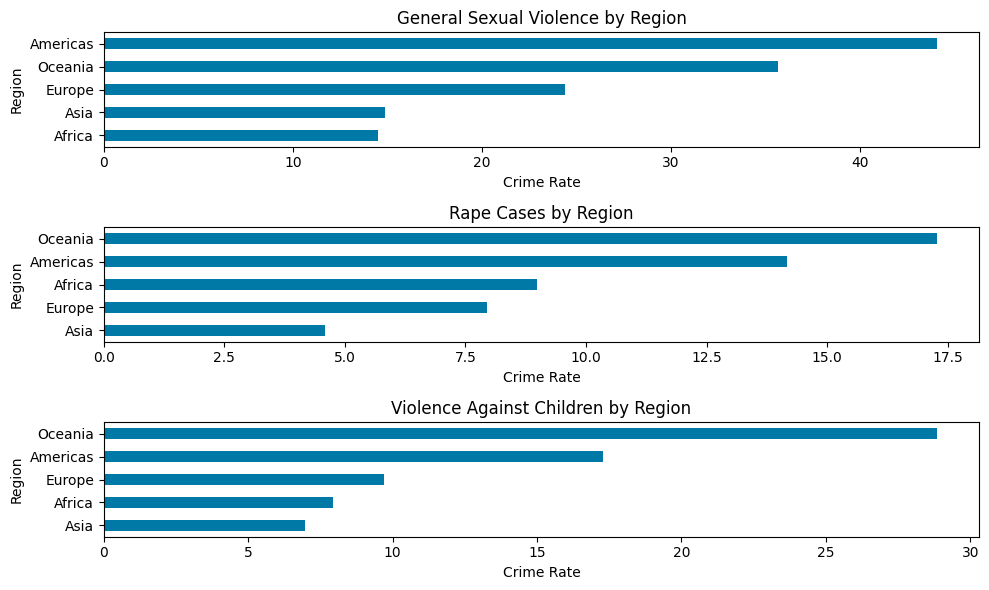

In [322]:
# Group by Region and Category to calculate average Crime Rate
region_category_group_avg = df_combined.groupby(['Region', 'Category'])['Crime Rate'].mean().unstack()

# Plot Horizontal Bar Chart for each crime category
categories = region_category_group_avg.columns  # Crime categories (e.g., Sexual Violence, Rape Cases, etc.)

# Set up the plot size
plt.figure(figsize=(10, 6))

# Loop through each crime category and plot horizontal bars
for idx, category in enumerate(categories):
    plt.subplot(len(categories), 1, idx + 1)  # Create a subplot for each category
    region_category_group_avg[category].sort_values().plot(kind='barh', color='#0179a7')

    # Title and labels
    plt.title(f'{category} by Region')
    plt.xlabel('Crime Rate')
    plt.ylabel('Region')

# Adjust the layout for better visibility
plt.tight_layout()
plt.show()

#### 2-4. Merge and Visualize Europe Map with GeoPandas
Resource: Technical University of Denmark (DTU) [Shapefile of European countries](https://data.dtu.dk/articles/dataset/Shapefile_of_European_countries/23686383?file=41565822)

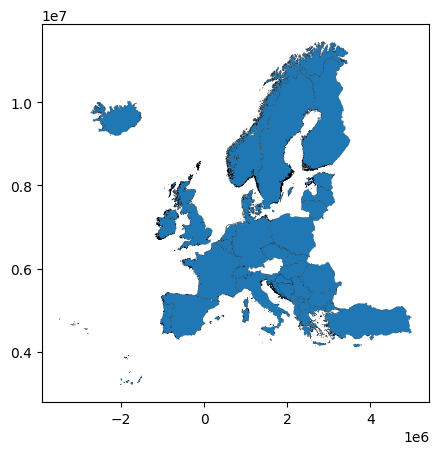

In [323]:
# Load the shapefile for the Europe map into a GeoDataFrame
gdf = gpd.read_file('/kaggle/input/cts-2012-sv/europe/europe_merged.shp')

# Check and reproject if needed
if gdf.crs != "EPSG:3857":
    gdf = gdf.to_crs(epsg=3857)

# Plot with better settings
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
gdf.plot(ax=ax, edgecolor='black', linewidth=0.1)

# Display the map plot to verify that it loaded successfully
plt.show()

#### 2-4-1. Ensure that Both Batasets (df_sv_cleaned vs. gdf) Have a Common Key
Check that both datasets contain a common key (e.g., country name) to enable a successful merge.

In [324]:
print("Shapefile columns:", gdf.columns)
print("General Sexual Violence dataset columns:", df_sv_cleaned.columns)

Shapefile columns: Index(['GID_0', 'COUNTRY', 'geometry'], dtype='object')
General Sexual Violence dataset columns: Index(['Region', 'Sub-region I', 'Sub-region II', 'Sub-region II.1',
       'Country/territory', 'Year', 'Crime Count', 'Crime Rate', 'Category'],
      dtype='object')


In [325]:
# Since the column names don’t match, rename Country/territory in df_sv_cleaned to COUNTRY
df_sv_cleaned = df_sv_cleaned.rename(columns={"Country/territory": "COUNTRY"})

# merge df_sv_cleaned with gdf
merged_gdf = gdf.merge(df_sv_cleaned, on="COUNTRY", how="left")

# Check for missing matches
missing_countries = gdf[~gdf["COUNTRY"].isin(df_sv_cleaned["COUNTRY"])]
print(missing_countries["COUNTRY"].unique())  # Check unmatched country names

['Czechia' 'Denmark' 'Kosovo' 'Latvia' 'Malta' 'North Macedonia'
 'United Kingdom']


#### 2-4-2. Update Country Names in df_sv_cleaned to Match those in The Europe Shapefile (gdf)
Map country names from the df_sv_cleaned to the correct ones in the shapefile.

In [326]:
# Replacing incorrect or incomplete country names in df_sv_cleaned using the country_mapping dictionary.
country_mapping = {
    "Czech Republic": "Czechia",
    "Denmark": "Denmark",  # Denmark is existing and spelling correctly in `df_sv_cleaned`
    "Kosovo": "Kosovo",  # Kosovo is missing from `df_sv_cleaned`
    "Latvia": "Latvia", # Latvia is existing and spelling correctly in `df_sv_cleaned`
    "Malta*": "Malta",
    "North Macedonia": "North Macedonia", # North Macedonia is missing from `df_sv_cleaned`
    "United Kingdom (England and Wales)": "United Kingdom",  # `df_sv_cleaned` uses "United Kingdom (England and Wales)", change it
    "United Kingdom (Scotland)": "United Kingdom", # `df_sv_cleaned` uses "United Kingdom (Scotland)", change it
    "United Kingdom (Northern Ireland)": "United Kingdom" # `df_sv_cleaned` uses "United Kingdom (Northern Ireland)", change it
}

df_sv_cleaned["COUNTRY"] = df_sv_cleaned["COUNTRY"].replace(country_mapping)

# Re-merge and check again
merged_gdf = gdf.merge(df_sv_cleaned, on="COUNTRY", how="left")

#Check remaining unmatched countries
missing_countries = gdf[~gdf["COUNTRY"].isin(df_sv_cleaned["COUNTRY"])]
print(missing_countries["COUNTRY"].unique())  

['Denmark' 'Kosovo' 'Latvia' 'North Macedonia']


#### 2-4-3. Visualize the Geospatial Map of Sexual Violence Crime Rate in Europe
Plot the merged geospatial map showing the crime rate data by country in Europe, with a color scale representing the crime rate. <br>
By default, GeoPandas uses a method called quantile-based classification or natural breaks for dividing the data into intervals and then assigning colors to each interval. It may have been assigned intervals that span from low to high crime rates, like 25-50, 50-75, etc., leading to those values.

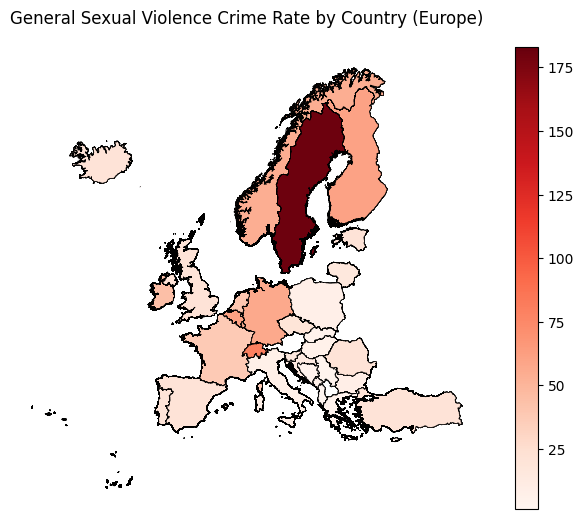

In [327]:
# Visualize the map
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

merged_gdf.plot(column="Crime Rate",  # Adjust if needed
                cmap="Reds",
                linewidth=0.5,
                edgecolor="black",
                legend=True,
                ax=ax)

ax.set_title("General Sexual Violence Crime Rate by Country (Europe)")
ax.axis("off")  # Hide axes

plt.show()

## 3. Exploratory Data Analysis
#### 3-1. Clustering
This code segments countries based on their crime rates, using a clustering algorithm (K-Means). The goal is to group countries with similar crime rate patterns, specifically focusing on different categories like General Sexual Violence, Rape Cases, and Violence Against Children. By applying K-Means clustering to the crime data, we can identify which countries share similar characteristics in terms of crime prevalence, and these segments can then be used for further analysis or targeted interventions.

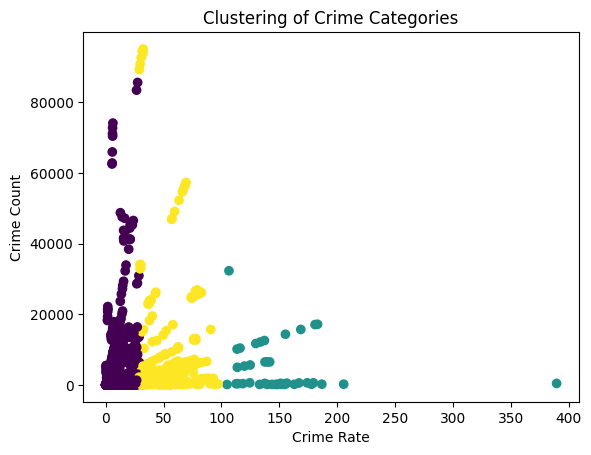

In [318]:
# Select features (Crime Rates for clustering)
crime_columns = ['Crime Rate']
X = df_combined[crime_columns]

# Filter data by specific crime category
df_sv = df_combined[df_combined['Category'] == 'General Sexual Violence']
df_rape = df_combined[df_combined['Category'] == 'Rape Cases']
df_violence = df_combined[df_combined['Category'] == 'Violence Against Children']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters based on your analysis
df_combined['crime_cluster'] = kmeans.fit_predict(X_scaled)

plt.scatter(df_combined['Crime Rate'], df_combined['Crime Count'], c=df_combined['crime_cluster'])
plt.xlabel('Crime Rate')
plt.ylabel('Crime Count')
plt.title('Clustering of Crime Categories')
plt.show()

#### 3-2. Prophet Model
Prophet is a time series forecasting model developed by Facebook (Meta) that is designed to handle missing data, seasonality, and trends effectively. <br>
In this case, it is used to predict future crime rates based on historical data.
- ds (Datetime Series) → This is the date column in Prophet. It must be a datetime format (e.g., "2003-01-01", "2010-01-01", etc.).
- y (Target Variable) → The crime rate that we aim to predict

10:49:47 - cmdstanpy - INFO - Chain [1] start processing
10:49:47 - cmdstanpy - INFO - Chain [1] done processing


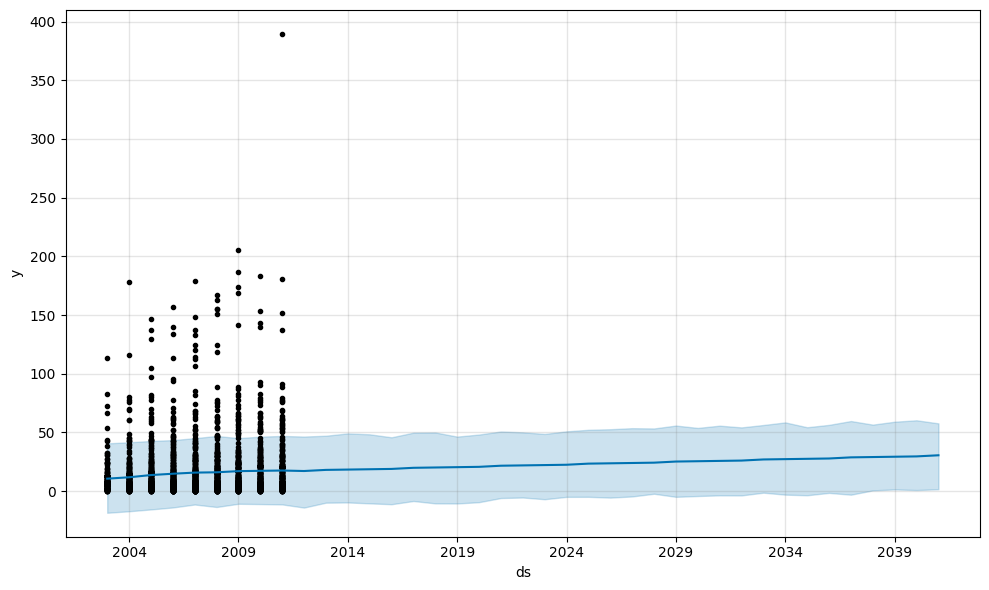

In [319]:
# Convert 'Year' to datetime
df_combined['ds'] = pd.to_datetime(df_combined['Year'], format='%Y')
df = df_combined[['ds', 'Crime Rate']].rename(columns={'Crime Rate': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(df)

# Predict next 30 years
future = model.make_future_dataframe(periods=30, freq='Y')
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.show()

The Prophet model plot typically includes three key visual elements:

- Scatter Points (Blue Dots): Represent the actual historical data (y values). These points show the crime rate recorded for each year.
- Predicted Line (Dark Blue Line): This is the model’s forecasted trend based on historical data. It represents the predicted crime rate for future years.
- Uncertainty Interval (Light Blue Shaded Region): This shows the confidence range (yhat_lower and yhat_upper). It accounts for possible variations in predictions due to data fluctuations.